# 1. House price Regression.

The HOUSES dataset contains a collection of recent real estate listings in San Luis Obispo county and
around it. The dataset is provided in RealEstate.csv. You may use “one-hot-keying” to expand the
categorical variables.
The dataset contains the following useful fields (You may excluding the Location and MLS in your
linear regression model).
You can use any package for this question.

• Price: the most recent listing price of the house (in dollars).

• Bedrooms: number of bedrooms.

• Bathrooms: number of bathrooms.

• Size: size of the house in square feet.

• Price/SQ.ft: price of the house per square foot.

• Status: Short Sale, Foreclosure and Regular.


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.utils.random import sample_without_replacement
import warnings
from scipy.special import seterr
from sklearn.metrics import classification_report, mean_squared_error, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import time

In [97]:
data = pd.read_csv("data/RealEstate.csv")
data.head()
data = data.rename(columns={'Price/SQ.Ft': 'PriceSF'})
data = data.drop(columns = ['MLS', 'Location'])

**(a) Fit the Ridge regression model to predict Price from all variable. You can use one-hot
keying to expand the categorical variable Status. Use 5-fold cross validation to select the regularizer optimal parameter, and show the CV curve. Report the fitted model (i.e., the parameters),
and the sum-of-squares residuals.**

In [98]:
dummied = OneHotEncoder().fit_transform(np.array(data['Status']).reshape(-1,1)).toarray()
dummied = pd.DataFrame(dummied).rename(columns = {0:"Foreclosure", 1:"Regular", 2:"Short Sale"})
data = pd.concat([data, dummied], axis = 1)
y = data["Price"].array
data = data.drop(columns = ['Price', 'Status'])
X = np.array(data)
# X

In [97]:
ridge = Ridge(normalize = True)
modelgrid = GridSearchCV(estimator=ridge, param_grid={'alpha':np.arange(0,10,0.01)}, cv=5, scoring='neg_mean_squared_error')

# print(f"Intercept: {model_grid}")
modelgrid.fit(X,y)

print(f"Best Parameter: {modelgrid.best_params_}")
print(f"Best MSE: {modelgrid.best_score_}")
print(f"Best Residual Sum of squares: {modelgrid.best_score_ * len(data)}")

# modelgrid

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.05425e-16): result may not be accurate.
  overwrite_a=True).T


Best Parameter: {'alpha': 0.01}
Best MSE: -25307474672.308075
Best Residual Sum of squares: -19765137719072.605


In [100]:
best = Ridge(normalize = True, alpha = .modelgrid.best_params_['alpha']).fit(X,y)
print(f"Best Ridge Model Intercept: {best.intercept_}")
print(f"Best Ridge Model Coefficients: {best.coef_}")

Best Ridge Model Intercept: -443198.5169718811
Best Ridge Model Coefficients: [-10006.30091368  19114.20456983    245.26000861   1819.45973587
  -2198.91109667  28716.79558686 -13053.28576906]


Text(0.5, 1.0, 'CV Curve')

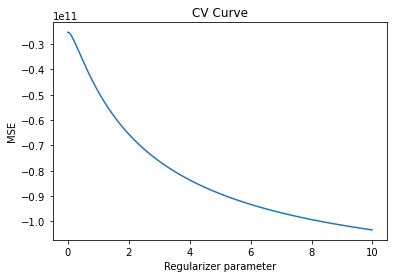

In [102]:
plt.plot(modelgrid.cv_results_['param_alpha'], modelgrid.cv_results_['mean_test_score'])
plt.xlabel('Regularizer parameter')
plt.ylabel('MSE')
plt.title("CV Curve")

**(b) Use lasso to select variables. Use 5-fold cross validation to select the regularizer optimal
parameter, and show the CV curve. Report the fitted model (i.e., the parameters selected and
their coefficient). Show the Lasso solution path.**

In [106]:
lasso = Lasso(normalize = True)
modelgrid = GridSearchCV(estimator=lasso, param_grid={'alpha':np.arange(0.01,10,0.01)}, cv=5, scoring='neg_mean_squared_error')

# print(f"Intercept: {model_grid}")
modelgrid.fit(X,y)

print(f"Best Parameter: {modelgrid.best_params_}")
print(f"Best MSE: {modelgrid.best_score_}")
print(f"Best Residual Sum of squares: {modelgrid.best_score_ * len(data)}")

Best Parameter: {'alpha': 0.01}
Best MSE: -25317367531.69432
Best Residual Sum of squares: -19772864042253.266


In [107]:
best = Lasso(normalize = True, alpha = modelgrid.best_params_['alpha']).fit(X,y)
print(f"Best Ridge Model Intercept: {best.intercept_}")
print(f"Best Ridge Model Coefficients: {best.coef_}")

Best Ridge Model Intercept: -453919.8216805881
Best Ridge Model Coefficients: [-10944.60538437  15476.89069166    251.00352397   1837.22695388
   6261.70770562  34847.54081836  -4261.78467586]


Text(0.5, 1.0, 'CV Curve')

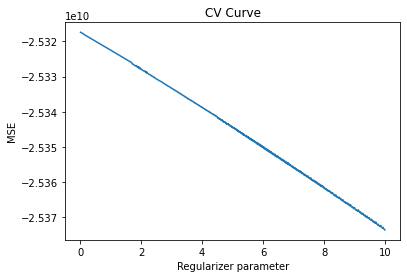

In [108]:
plt.plot(modelgrid.cv_results_['param_alpha'], modelgrid.cv_results_['mean_test_score'])
plt.xlabel('Regularizer parameter')
plt.ylabel('MSE')
plt.title("CV Curve")

**(c) Use elastic net to select variables. Report the fitted model (i.e., the parameters selected
and their coefficient). Use 5-fold cross validation to select the regularizer optimal parameter.**

In [110]:
elastic = ElasticNet(normalize = True)
modelgrid = GridSearchCV(estimator=elastic, param_grid={'alpha':np.arange(0.01,10,0.01)}, cv=5, scoring='neg_mean_squared_error')

# print(f"Intercept: {model_grid}")
modelgrid.fit(X,y)

print(f"Best Parameter: {modelgrid.best_params_}")
print(f"Best MSE: {modelgrid.best_score_}")
print(f"Best Residual Sum of squares: {modelgrid.best_score_ * len(data)}")

Best Parameter: {'alpha': 0.01}
Best MSE: -77301718699.47983
Best Residual Sum of squares: -60372642304293.74


In [111]:
best = Lasso(normalize = True, alpha = modelgrid.best_params_['alpha']).fit(X,y)
print(f"Best Ridge Model Intercept: {best.intercept_}")
print(f"Best Ridge Model Coefficients: {best.coef_}")

Best Ridge Model Intercept: -453919.8216805881
Best Ridge Model Coefficients: [-10944.60538437  15476.89069166    251.00352397   1837.22695388
   6261.70770562  34847.54081836  -4261.78467586]


Text(0.5, 1.0, 'CV Curve')

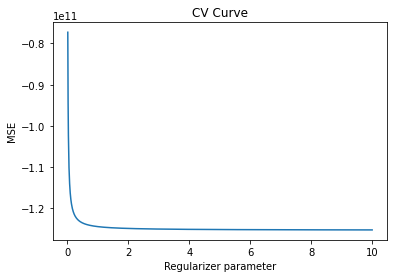

In [112]:
plt.plot(modelgrid.cv_results_['param_alpha'], modelgrid.cv_results_['mean_test_score'])
plt.xlabel('Regularizer parameter')
plt.ylabel('MSE')
plt.title("CV Curve")

The Lasso reconstruction is the best reconstruciton, as we can see that it eliminates the most noise.

# 4. Locally weighted linear regression and bias-variance tradeoff. 

Consider a dataset with n data points $(x_i, y_i), x_i ∈ R^p$, following the following linear model

$$y_i = β*^T x_i + \epsilon_i, i = 1, . . . , n, $$

where $\epsilon_i ∼ N (0, \sigma_i^2)$ are independent (but not identically distributed) Gaussian noise with zero mean
and variance $\sigma_i^2$.


**(a) Show that the ridge regression which introduces a squared $l_2$ norm penalty on the
parameter in the maximum likelihood estimate of β can be written as follows**

$$ \hat{\beta}(\lambda) = argmin \big\{ (X\beta - y)^T W(X\beta - y) + \lambda ||\beta||_2^2 \big\} $$
	
**for property defined diagonal matrix W, matrix X and vector y.**

For ridge regression, we need to minimize the likelihood function, subject to an additional constraint. This restraint can be written as:
    $$ \hat{\beta}(\lambda) = minimize \sum_{i=1}^m W (y^i - \beta^Tx^i)^2 + \lambda \sum_{j=1}^p\beta_j^2 $$

$$ = minimize \sum_{i=1}^m W (y^i - \beta^Tx^i)^2 + \lambda||\beta||_2^2 $$

$$ = minimize \sum_{i=1}^m (y^i - X\beta)^T W (y^i - X\beta) + \lambda||\beta||_2^2 $$

**(b)  Find the close-form solution for βb(λ) and its distribution conditioning on {xi}.**

By taking the derivative of the above with respect to $\beta$, we get:

$$ \frac{\partial\hat{\beta}(\lambda)}{\partial\beta} = -2X^T(y - X\beta) + 1\lambda\beta $$

This simplifies to:

$$ \hat{\beta}(\lambda) = (X^T X + \lambda I)^{-1} X^Ty $$

**(c)  Derive the bias as a function of λ and some fixed test point x.**

We can write the bias, $E[ \hat{\beta}(\lambda)^T x] - (\beta^*)^Tx $, as:

$$ (X^TX + \lambda I)^{-1} X^TX\beta $$

Which can be simplified to:
$$ = \beta - \lambda(X^TX + \lambda I) ^{-1} \beta $$

**(d) Derive the variance term as a function of λ.**

From the $E[\hat\beta]$ calculated in Q 4b and the definitions that $Var[x]= E[x^2]−E[x]^2$, we get the following:

$$ Var = \sigma^2 ( X^TX + \lambda I)^{-1} (X^TX)(X^TX + \lambda)^{-1} $$